In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 150

In [2]:
houses = pd.read_table("AmesHousing_1.txt", delimiter = "\t")

In [3]:
print(houses['SalePrice'].mean())

180796.0600682594


Let's say that instead of the houses data set, we only have the following summary table based on it:

In [4]:
houses.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
houses_per_year = pd.DataFrame()

In [6]:
houses_per_year["Year"] = [2006,2007,2008,2009,2010]
houses_per_year["Mean Price"] = [181761.648000,185138.207493,178841.750804,181404.567901,
                                 172597.598240]
houses_per_year["Houses Sold"] = [625,694,622,648,341]

In [7]:
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [8]:
# alternate of above
houses.groupby("Yr Sold")['SalePrice'].agg(["mean", "size"]).reset_index()

,Yr Sold,mean,size
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


Once again, our task is to find the mean house sale price across all years. Intuitively, we just need to find the mean of the Mean Price column

In [9]:
mean_new = houses_per_year["Mean Price"].mean()
mean_original = houses["SalePrice"].mean()
difference = mean_original - mean_new
difference

847.3055806593911

Rather counterintuitively, we noticed that the mean of the `Mean Price` column is not equal to that of the `SalePrice` column. The root of the problem is related to the fact that we have different number of houses sold each year (notice the Houses Sold column)

Because each year has a different number of sold houses, the mean of sale prices for each individual year weighs differently in the overall mean. But when we computed the mean of the `Mean Price` column, we gave each year the same weight because we added all the five mean prices and then divided by 5.

To compute the correct overall mean, we need to:

* Find the sum of prices for each year individually. For instance, 341 houses were sold in 2010 and each house had an average price of approximately $172598. The sum of prices for year 2010 is `341x172598 = 58855918`.
* Add all the sums together.
* Divide the final sum by the number of houses sold (not by the number of years) to find the mean sale price per house.

In [10]:
houses_per_year['sum_per_year']  = houses_per_year['Mean Price'] * houses_per_year['Houses Sold']

weighted_mean = houses_per_year['sum_per_year'].sum()/houses_per_year['Houses Sold'].sum()
weighted_mean

180796.0600682314

In [11]:
# alternative method
weighted_mean = ((houses_per_year["Houses Sold"]/houses_per_year["Houses Sold"].sum())*houses_per_year["Mean Price"]).sum()
weighted_mean

180796.06006823143

In [12]:
mean_original = houses['SalePrice'].mean()

difference  = round(mean_original,10)-round(weighted_mean,10)
print(round(difference,1))

0.0


When we take into account the different weights and compute the mean like we did we call that mean the **weighted mean**

The weighted mean can be abbreviated just like the arithemtic mean: `𝑥¯` for samples, and `μ` for populations.

In [13]:
# function that computes the weighted mean for any array of numbers

def weighted_mean(mean_values,weights):
    sum_prices = []
    for i in range(len(mean_values)): # we can either use len(mean_values) or len(weights) 
        sum_prices.append(mean_values[i]*weights[i])
    return sum(sum_prices)/sum(weights)
    
weighted_mean_function = weighted_mean(houses_per_year['Mean Price'],houses_per_year['Houses Sold'])
weighted_mean_function

180796.0600682314

Use the [numpy.average()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html) function to compute the weighted mean for the same `Mean Price` column

In [14]:
#  numpy.average() Compute the weighted average along the specified axis.
weighted_mean_numpy = np.average(houses_per_year['Mean Price'],
                                 weights =houses_per_year['Houses Sold'])
weighted_mean_numpy

180796.0600682314

In [15]:
# Compare the two weighted means 
weighted_mean_numpy == weighted_mean_function

True

While learning about the weighted mean we saw that there are distributions where it's possible to compute the mean, although that wouldn't be correct. There are distributions, however, where it's impossible to compute the mean.

In [16]:
print(houses['TotRms AbvGrd'].value_counts())

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64


The lowest boundary of the distribution is well-defined — the lowest value is 2 and no value in the distribution can be lower than that. But the upper boundary is not defined as precisely — the highest value is "10 or more" which means that houses can actually have 10, 11, 15, or even more rooms. The upper boundary ("10 or more") is thus open, and for this reason we say that the `TotRms AbvGrd` variable has an **open-ended distribution**.

It's still reasonable to want to find an average value (a single representative value) for this distribution, but "10 or more" is not numerical, which makes it impossible to compute the mean.

A common workaround is to sort all the values in the distribution in an ascending order and then select the middle value as the most representative value of the distribution. We call this middle value **the median**

When a distribution has an even number of values, it's not clear which is the middle one. It's impossible to choose a value from this distribution that divides the distribution in two halves of equal length. The workaround is to take the two middle values and compute their mean. This value is the average value of the distribution. 

In statistics, the term **average** refers to the most representative value of a distribution. Although it's common to use **average** and **mean** interchangeably, **average** is not restricted to refer only to the mean. Depending on the context, it can also refer to the **median** or the **mode**.

There's no widely accepted standard notation — most commonly, both the sample and the population median are simply denoted with the word **median**

Unlike the mean, the median doesn't have a neat way to be defined algebraically. This is because sorting a distribution in an ascending order and then choosing a middle value or two doesn't involve any arithmetic. 
* The different treatment for odd and even-numbered distributions also poses some theoretical challenges for constructing a single definition.

In [17]:
# Find the median value of the TotRms AbvGrd column.

rooms = houses['TotRms AbvGrd'].copy()

# Replace the '10 or more' value with the integer 10
mapping = {"10 or more":10}
rooms.replace(mapping, inplace = True) # using the Series.replace() method.

In [18]:
rooms = rooms.astype(int)
values = rooms.sort_values().values
values

array([ 2,  3,  3, ..., 10, 10, 10])

In [28]:
np.median(values)

6.0

In [30]:
median = 0
if values.size%2 != 0:
    median = values[round(values.size/2)]
else:
    median = (values[int(values.size/2)-1] + values[int((values.size/2))])/2
median

6.0

* When we compute the mean, we account equally for each value in the distribution — we sum up all the values in the distribution and then divide the total by the number of values we added. 
* When we compute the median, however, we don't consider equally each value in the distribution. In fact, we only consider the middle value (or the middle two values).

This property makes the median more resistant to changes in the data compared to the mean.

`[2,3,5,5,10]`

Both the median and the mean of this distribution are 5

`[2,3,5,5,1000]`

The median is still 5, but the mean is now 203. This is because the mean takes into account every value in the distribution, while the median considers only the middle value. Because the median is so resistant to changes in the data, it's classified as a **resistant or robust statistic**.

This property makes the median ideal for finding reasonable averages for distributions containing **outliers**.

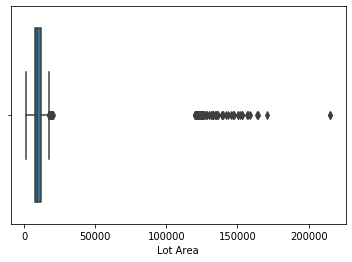

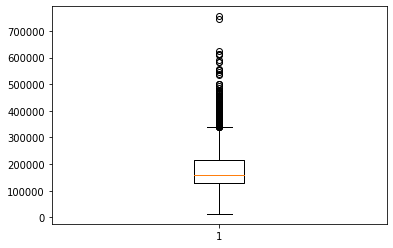

In [22]:
# The Lot Area and SalePrice variables have outliers. 
# Confirm this information by visualizing the distributions using a box plot

import matplotlib.pyplot as plt

import seaborn as sns

sns.boxplot(houses["Lot Area"])
plt.show()
# houses["Lot Area"].plot.box()
# plt.show()

plt.boxplot(houses['SalePrice'])
plt.show()

In [23]:
lotarea_difference = houses["Lot Area"].mean() - houses["Lot Area"].median()
saleprice_difference = houses['SalePrice'].mean()-houses['SalePrice'].median()
print(lotarea_difference, saleprice_difference)

3680.7051194539254 20796.060068259394


Data points belonging to **ordinal variables** are often coded using numbers

In [24]:
print(houses['Overall Cond'].value_counts().sort_index())

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64


Because words like **fair or average** are coded with numbers, it becomes mathematically possible to compute the mean. 
* But whether or not it's theoretically sound to compute the mean for **ordinal variables** is contentious

If the overall condition of a house is rated with an 
* 8 (Excellent)
* 4 (Below average), 

We can't say that the conditions of the former are twice as better than the latter. The most we can say is that the house which got an **8** has better conditions (we can't quantify how much better — it could be **twice as better**, **three times** as better, **1.5 times** as better, we simply don't know).

This should be more clear if we consider the fact that the numbers used to encode the quality levels ("Poor", "Fair", "Good", etc.) are chosen arbitrarily. 
* Instead of numbers from 1 to 10, we could have numbers from 30 to 40, or from 50 to 70 in steps of 2, or from 0 to 9:

It can be argued thus that the numerical values of an ordinal variable are not subject to meaningful arithmetical operations. But computing the mean involves meaningful arithmetical operations, so it's not theoretically sound to use the mean for ordinal variables.

Because the median doesn't involve arithmetical operations, it's considered a better alternative to the mean. This doesn't fully apply, however, to even-numbered distributions, where we need to take the mean of the middle two values to find the median. This poses some theoretical problems too.

In [25]:
mean = houses["Overall Cond"].mean()
median = houses["Overall Cond"].median()
print(round(mean,2), median)

5.56 5.0


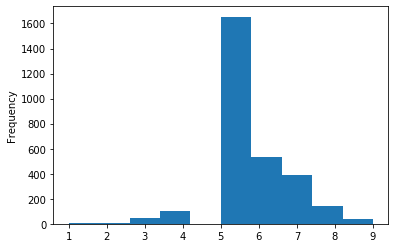

In [26]:
houses["Overall Cond"].plot.hist()

The mean seems more representative and more informative because it captures the
fact that there are more houses rated above 5 than rated under 5. Because of this,
the mean is slightly shifted above 5. 


Although it can be argued that it's theoretically unsound to compute the mean for ordinal variables, above we found the mean more informative and representative than the median. 
* The truth is that in practice many people get past the theoretical hurdles and use the mean nonetheless because in many cases it's much richer in information than the median.

Let's consider a situation where the mean is arguably a much better choice to measure the average of an ordinal variable.

Let's say we're working for an online real estate company which allows customers to buy, sell, and rent houses. The speed on our website is important for all of our customers, and we want to measure how the customers perceive the speed on the website.

The survey yielded the distribution below, whose mean and median have both a value of 2:
$$[1,1,1,2,2,2,2,3,3,3]$$

After being presented with the results, the engineering team implemented a few changes meant to improve speed, and now we repeat the survey on another random sample of 10 customers and get these results:
$$[1,2,2,2,2,2,4,5,5,5]$$




The median is still 2, and it suggests that nothing changed. The mean, however, went up to 3, suggesting that the changes our engineers made have had a positive effect. Unlike the median, the mean is sensitive to small changes in the data, and this property is what makes it more useful in this case.

It should be clear by now that whether we should use the mean for ordinal data is contentious. In practice, we should be flexible and make our choice on a case by case basis. Also, we are not constrained to choose one metric or the other — we can choose both the mean and median to describe a distribution.